[Equity: Calculate Return on Equity (ROE) for stocks in a data file.](http://www.cse.msu.edu/~cse231/PracticeOfComputingUsingPython/05_ListsTuples/Equity/)

In [1]:
import pandas as pd

In [2]:
# Load and print data
data = pd.read_csv("SBUX.csv") 
years = []
for lbl in data:
    years.append(lbl)

del years[0]
print(years)
print(data)

['2003', '2004', '2005', '2006', '2007', '2008', '2009']
           Unnamed: 0     2003     2004     2005     2006     2007    2008  \
0    Income statement      NaN      NaN      NaN      NaN      NaN     NaN   
1       Total Revenue  4075.52  5294.25  6369.30  7786.94  9411.50  9774.6   
2    Operating Income   420.85   606.49   780.52   893.95  1053.94   562.0   
3          Net Income   265.36   388.88   494.37   564.26   672.64   390.8   
4       Balance Sheet      NaN      NaN      NaN      NaN      NaN     NaN   
5        Total Assets  2778.53  3386.54  3513.69  4428.94  5343.88  5576.8   
6        Total Equity  2071.11  2470.21  2090.26  2228.51  2284.12  3045.7   
7   Total Liabilities   707.42   916.33  1423.43  2200.43  3059.76  2531.1   
8           Cash Flow      NaN      NaN      NaN      NaN      NaN     NaN   
9           Operating   616.12   862.92   922.91  1131.63  1331.22  1389.0   
10          Investing  -616.42  -753.89  -220.62  -841.04 -1201.95  -421.1   
11     

In [3]:
# Extract impotant data and compute the average stockholder equity
Sales = []
Total_Assets = []
Net_Income = []
EQ = []
Liabilities = []
AEQ = []
for i, year in enumerate(years):
    Sales.append(data[year][1])
    Net_Income.append(data[year][3])
    Total_Assets.append(data[year][5])
    EQ.append(data[year][6])
    Liabilities.append(data[year][7])
    if i == 0:
        AEQ.append(EQ[0])
    else:
        eq = (EQ[i] + EQ[i-1])/2
        AEQ.append(eq)
        
print(Sales)
print(Net_Income)
print(Total_Assets)
print(EQ)
print(Liabilities)
print(AEQ)

[4075.52, 5294.25, 6369.3, 7786.94, 9411.5, 9774.6, 10707.4]
[265.36, 388.88, 494.37, 564.26, 672.64, 390.8, 945.6]
[2778.53, 3386.54, 3513.69, 4428.94, 5343.88, 5576.8, 6385.9]
[2071.11, 2470.21, 2090.26, 2228.51, 2284.12, 3045.7, 3674.7]
[707.42, 916.33, 1423.43, 2200.43, 3059.76, 2531.1, 2711.2]
[2071.11, 2270.66, 2280.235, 2159.385, 2256.315, 2664.91, 3360.2]


In [4]:
# Compute ROE, method 1 = Net income after tax / Equity
ROE1 = []
for i in range(len(EQ)):
    ROE1.append(100 * Net_Income[i]/EQ[i])
    
print(ROE1)

[12.812453225565035, 15.742791098732496, 23.651124740462908, 25.320056899004264, 29.44854035689894, 12.83120464917753, 25.73271287452037]


In [5]:
# Compute ROE, method 2 = DuPont Formula: Net_Income/Sales X Sales/Total_Assets X Total_Assets/Average_Equity
#                                       : Net_Income/Average_Equity
ROE2 = []
for i in range(len(AEQ)):
    ROE2.append(100 * Net_Income[i]/AEQ[i])
print(ROE2)

[12.812453225565035, 17.126298080734237, 21.68066010740121, 26.130588107262017, 29.811440335236878, 14.664660345002272, 28.141182072495685]


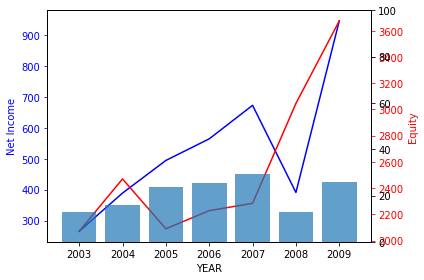

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline  

fig, ax1 = plt.subplots()

ax1.plot(years, Net_Income, 'b')
ax1.set_xlabel('YEAR')
ax1.set_ylabel('Net Income', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(years, EQ, 'r-')
ax2.set_ylabel('Equity', color='r')
ax2.tick_params('y', colors='r')

ax3 = ax1.twinx()
ax3.set_ylim([0,100])
ax3 = plt.bar(years, ROE1, alpha=0.7)

fig.tight_layout()
plt.show()

In [7]:
# With  sales,  total  assets,  net  margin,  asset  turnover,  financial leverage and ROE in the same figure
# net margin = net income / sales(total revenue)
# asset  turnover = Sales/Assets
# Financial Leverage = Liabilities/Equity
Net_Margin = []
Asset_Turnover = []
Leverage = []
for i in range(7):
    Net_Margin.append(100 * Net_Income[i] / Sales[i])
    Asset_Turnover.append(Sales[i] / Total_Assets[i])
    Leverage.append(Liabilities[i] / EQ[i])

labels = ["Sales", "Total Assets", "Net Margin %", "Asset Turnover", "Financial Leverage", "ROE %"]
to_plot = [Sales, Total_Assets, Net_Margin, Asset_Turnover, Leverage, ROE1]
#fig = plt.figure()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
#for i in range(1, 7):
#    ax = fig.add_subplot(3, 2, i)
#    try:
#        ax.plot(years, to_plot[i-1])
#    except:
#        pass

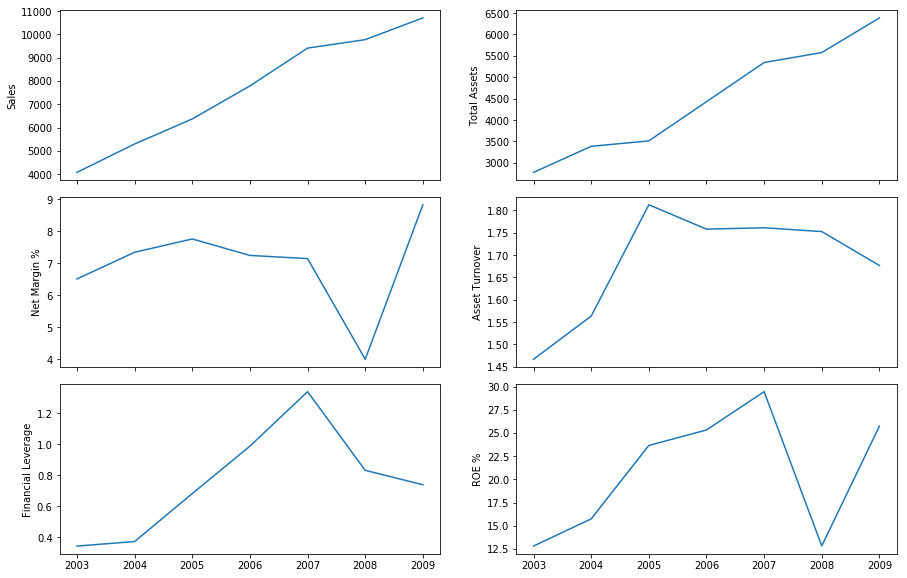

In [8]:
counter = 0
fig, ax = plt.subplots(3, 2, sharex='col', figsize=(15,10))
fig.subplots_adjust(hspace=0.1, wspace=0.2)

for i in range(3):
    for j in range(2):
        try:
            ax[i, j].plot(years, to_plot[counter])
            ax[i, j].set_ylabel(labels[counter])
            counter+=1
        except:
            pass